<a href="https://colab.research.google.com/github/jh9553-commits/The-relation-between-Chinese-Gold-Jewelry-Company-stock-prices-and-Gold-Future-prices/blob/main/Final_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import jarque_bera
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import traceback

In [25]:
def collect_research_data(start_date='2010-01-01', end_date='2025-10-13'):
    """Data collection following Research Methodology Section 5.1."""

    # All assets in one place
    assets = {
        'gold_prices': {
            'COMEX_Gold_Futures': 'GC=F',
            'Gold_ETF_GLD': 'GLD',
            'Gold_ETF_IAU': 'IAU',
            'Silver_Futures': 'SI=F'
        },
        'hk_jewelry': {
            'Chow_Tai_Fook': '1929.HK',
            'Laopu_Gold': '6181.HK',
            'Luk_Fook_Holdings': '0590.HK',
            'Chow_Sang_Sang': '0116.HK'
        },
        'china_jewelry': {
            'China_National_Gold': '600916.SS'
        },
        'indices': {
            'Hang_Seng_Index': '^HSI'
        }
    }

    results = {}

    for category, tickers in assets.items():
        print(f"\nCollecting {category.replace('_', ' ').title()} Data...")
        results[category] = {}

        for name, ticker in tickers.items():
            try:
                df = yf.download(ticker, start=start_date, end=end_date, progress=False)
                if df.empty:
                    print(f"✗ Downloaded empty DataFrame for {name} ({ticker})")
                    continue

                # Flatten MultiIndex columns
                if isinstance(df.columns, pd.MultiIndex):
                    df.columns = [col[0] for col in df.columns]

                results[category][name] = df
                print(f"✓ Downloaded {name} ({ticker})")
                print(f"Columns: {df.columns.tolist()}")

            except Exception as e:
                print(f"✗ Error downloading {name} ({ticker}): {e}")

    return results


# Execute
if __name__ == "__main__":
    print("RESEARCH DATA COLLECTION")
    research_data = collect_research_data()

    # Save to CSV
    for category, data_dict in research_data.items():
        for asset_name, df in data_dict.items():
            if not df.empty:
                filename = f"{category}_{asset_name}.csv"
                df.to_csv(filename)
                print(f"Saved {filename}")

    print("Research data collection complete!")


RESEARCH DATA COLLECTION

✓ Downloaded COMEX_Gold_Futures (GC=F)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Gold_ETF_GLD (GLD)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Gold_ETF_IAU (IAU)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Silver_Futures (SI=F)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']

✓ Downloaded Chow_Tai_Fook (1929.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']


/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning

✓ Downloaded Laopu_Gold (6181.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Luk_Fook_Holdings (0590.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
✓ Downloaded Chow_Sang_Sang (0116.HK)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']

✓ Downloaded China_National_Gold (600916.SS)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']

✓ Downloaded Hang_Seng_Index (^HSI)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Saved gold_prices_COMEX_Gold_Futures.csv


/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2925655689.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Saved gold_prices_Gold_ETF_GLD.csv
Saved gold_prices_Gold_ETF_IAU.csv
Saved gold_prices_Silver_Futures.csv
Saved hk_jewelry_Chow_Tai_Fook.csv
Saved hk_jewelry_Laopu_Gold.csv
Saved hk_jewelry_Luk_Fook_Holdings.csv
Saved hk_jewelry_Chow_Sang_Sang.csv
Saved china_jewelry_China_National_Gold.csv
Saved indices_Hang_Seng_Index.csv
Research data collection complete!


In [26]:
def calculate_returns_all_freq(data, freqs=['Daily', 'Monthly', 'Quarterly', 'Yearly']):
    """Calculate returns and perform statistical tests across all frequencies."""

    fmap = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    all_results = {}

    for freq in freqs:
        print(f"\n{'='*80}")
        print(f"{freq} RETURNS ANALYSIS")
        print(f"{'='*80}")

        returns = {}

        for category, data_dict in data.items():
            print(f"\n{category}:")
            returns[category] = {}

            for asset, df in data_dict.items():
                if df.empty or 'Close' not in df.columns:
                    continue

                # Calculate returns at frequency
                if freq == 'Daily':
                    rets = df['Close'].pct_change().dropna()
                else:
                    rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()

                if len(rets) < 3:
                    print(f"  {asset}: Insufficient data ({len(rets)} obs)")
                    continue

                returns[category][asset] = rets

                print(f"\n  --- {asset} ---")
                print(f"  Stats: Mean={rets.mean():.4%}, Std={rets.std():.4%}, "
                      f"Min={rets.min():.4%}, Max={rets.max():.4%}")
                print(f"  Period: {rets.index[0].strftime('%Y-%m-%d')} to "
                      f"{rets.index[-1].strftime('%Y-%m-%d')} (N={len(rets)})")

                # Jarque-Bera test
                try:
                    jb = jarque_bera(rets)
                    print(f"  Jarque-Bera: Stat={jb.statistic:.4f}, p={jb.pvalue:.4f}, "
                          f"Skew={rets.skew():.4f}, Kurt={rets.kurt():.4f}")
                    print(f"  Normal? {'No (reject H0)' if jb.pvalue < 0.05 else 'Maybe (fail to reject H0)'}")
                except Exception as e:
                    print(f"  JB test error: {e}")

        all_results[freq] = returns

    return all_results


# Usage - runs all four frequencies
all_returns = calculate_returns_all_freq(research_data)





Daily RETURNS ANALYSIS

gold_prices:

  --- COMEX_Gold_Futures ---
  Stats: Mean=0.0372%, Std=1.0148%, Min=-9.3538%, Max=5.9477%
  Period: 2010-01-05 to 2025-10-10 (N=3966)
  Jarque-Bera: Stat=4257.4379, p=0.0000, Skew=-0.4564, Kurt=5.0009
  Normal? No (reject H0)

  --- Gold_ETF_GLD ---
  Stats: Mean=0.0354%, Std=0.9853%, Min=-8.7808%, Max=4.9038%
  Period: 2010-01-05 to 2025-10-10 (N=3967)
  Jarque-Bera: Stat=2885.9468, p=0.0000, Skew=-0.3670, Kurt=4.1203
  Normal? No (reject H0)

  --- Gold_ETF_IAU ---
  Stats: Mean=0.0360%, Std=0.9852%, Min=-8.8459%, Max=4.9505%
  Period: 2010-01-05 to 2025-10-10 (N=3967)
  Jarque-Bera: Stat=2922.1752, p=0.0000, Skew=-0.3707, Kurt=4.1455
  Normal? No (reject H0)

  --- Silver_Futures ---
  Stats: Mean=0.0436%, Std=1.9226%, Min=-17.7541%, Max=9.2862%
  Period: 2010-01-05 to 2025-10-10 (N=3966)
  Jarque-Bera: Stat=5086.1932, p=0.0000, Skew=-0.5595, Kurt=5.4423
  Normal? No (reject H0)

hk_jewelry:

  --- Chow_Tai_Fook ---
  Stats: Mean=0.0520%, Std=

/tmp/ipython-input-2146023400.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()
/tmp/ipython-input-2146023400.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()
/tmp/ipython-input-2146023400.py:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rets = df['Close'].resample(fmap[freq]).last().pct_change().dropna()



Daily (N=291):
                     COMEX_Gold_Futures  Gold_ETF_GLD  Gold_ETF_IAU  \
COMEX_Gold_Futures             1.000000      0.935844      0.935191   
Gold_ETF_GLD                   0.935844      1.000000      0.999634   
Gold_ETF_IAU                   0.935191      0.999634      1.000000   
Silver_Futures                 0.651141      0.614318      0.614860   
Chow_Tai_Fook                  0.226661      0.176798      0.172842   
Laopu_Gold                     0.154039      0.150471      0.147491   
Luk_Fook_Holdings              0.162193      0.104957      0.103574   
Chow_Sang_Sang                 0.098743      0.068794      0.067285   
China_National_Gold            0.161693      0.143835      0.142583   
Hang_Seng_Index                0.116504      0.124443      0.119498   

                     Silver_Futures  Chow_Tai_Fook  Laopu_Gold  \
COMEX_Gold_Futures         0.651141       0.226661    0.154039   
Gold_ETF_GLD               0.614318       0.176798    0.150471   
Gold

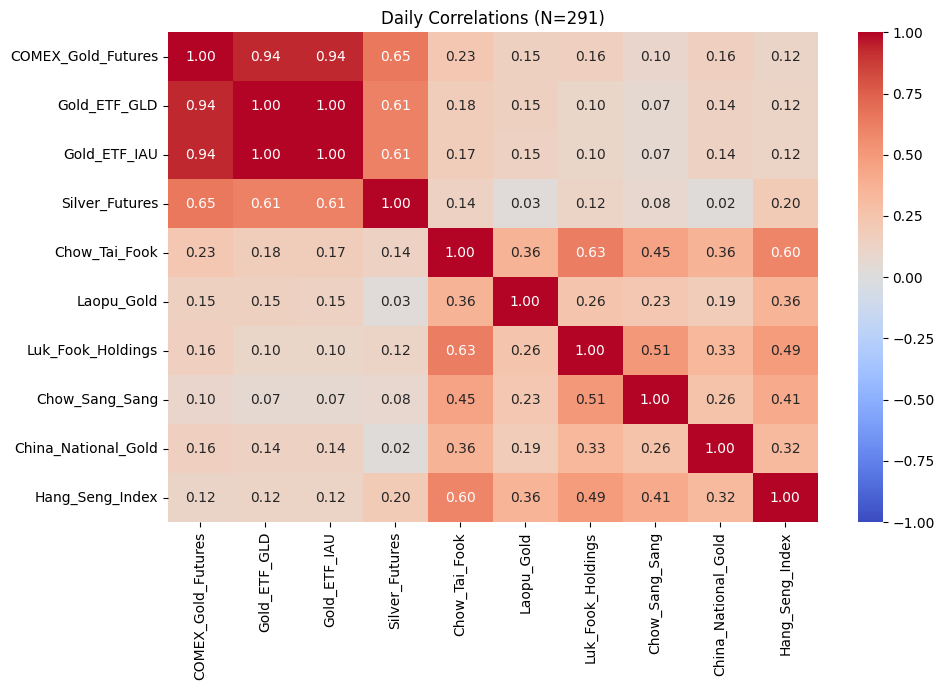

/tmp/ipython-input-2365862486.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  p.resample(fmap[freq]).last().pct_change().dropna().rename(n)



Monthly (N=16):
                     COMEX_Gold_Futures  Gold_ETF_GLD  Gold_ETF_IAU  \
COMEX_Gold_Futures             1.000000      0.986785      0.986456   
Gold_ETF_GLD                   0.986785      1.000000      0.999950   
Gold_ETF_IAU                   0.986456      0.999950      1.000000   
Silver_Futures                 0.685164      0.677369      0.674748   
Chow_Tai_Fook                  0.301012      0.243475      0.241680   
Laopu_Gold                     0.362159      0.345839      0.343591   
Luk_Fook_Holdings              0.088584      0.026480      0.024775   
Chow_Sang_Sang                 0.186024      0.131501      0.129975   
China_National_Gold            0.174121      0.135407      0.135585   
Hang_Seng_Index                0.055733      0.063416      0.064830   

                     Silver_Futures  Chow_Tai_Fook  Laopu_Gold  \
COMEX_Gold_Futures         0.685164       0.301012    0.362159   
Gold_ETF_GLD               0.677369       0.243475    0.345839   
Gol

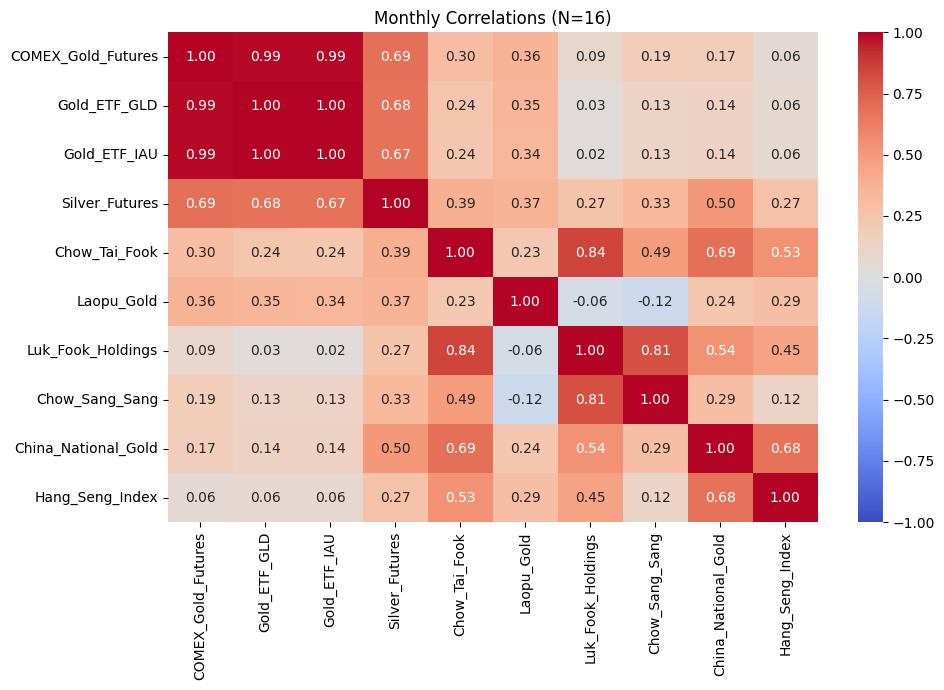

/tmp/ipython-input-2365862486.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  p.resample(fmap[freq]).last().pct_change().dropna().rename(n)



Quarterly (N=6):
                     COMEX_Gold_Futures  Gold_ETF_GLD  Gold_ETF_IAU  \
COMEX_Gold_Futures             1.000000      0.999579      0.999638   
Gold_ETF_GLD                   0.999579      1.000000      0.999994   
Gold_ETF_IAU                   0.999638      0.999994      1.000000   
Silver_Futures                 0.892667      0.896492      0.896070   
Chow_Tai_Fook                  0.457667      0.473017      0.470255   
Laopu_Gold                     0.391568      0.389037      0.389189   
Luk_Fook_Holdings              0.415735      0.425373      0.423027   
Chow_Sang_Sang                 0.509939      0.513884      0.512603   
China_National_Gold            0.723465      0.737149      0.737007   
Hang_Seng_Index                0.899875      0.893042      0.893424   

                     Silver_Futures  Chow_Tai_Fook  Laopu_Gold  \
COMEX_Gold_Futures         0.892667       0.457667    0.391568   
Gold_ETF_GLD               0.896492       0.473017    0.389037   
Go

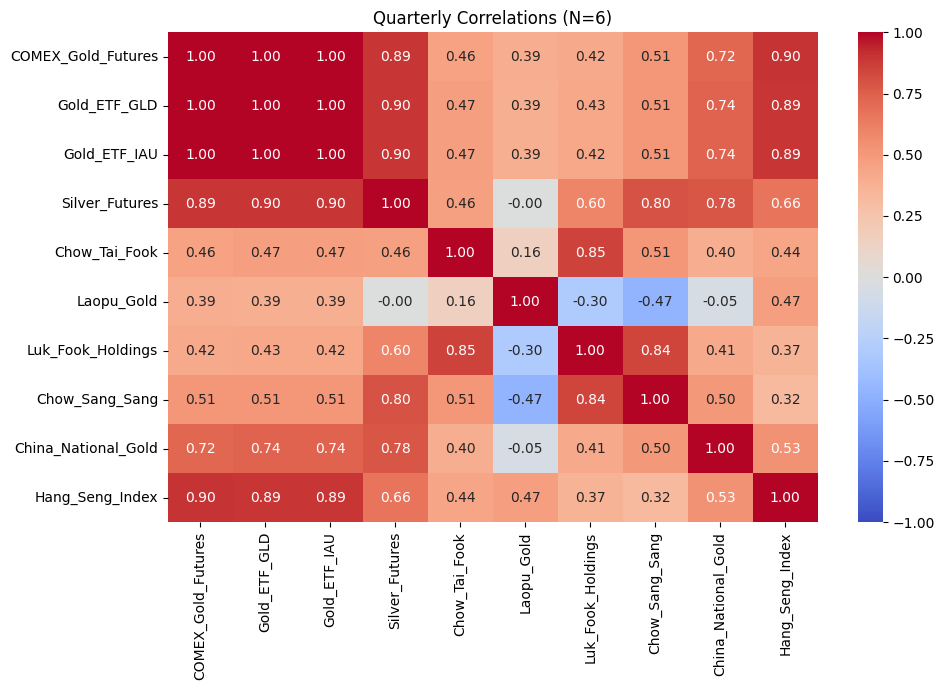

In [27]:
def corr_all_freq(data, freqs=['Daily', 'Monthly', 'Quarterly']):
    """Streamlined correlation analysis from price data."""
    fmap = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q'}
    results = {}

    for freq in freqs:
        try:
            # Get all price series
            prices = {n: d['Close'] for cat in data.values() for n, d in cat.items() if 'Close' in d.columns}

            # Calculate returns
            rets = [p.pct_change().dropna().rename(n) if freq == 'Daily' else
                   p.resample(fmap[freq]).last().pct_change().dropna().rename(n)
                   for n, p in prices.items()]

            df = pd.concat(rets, axis=1).dropna()

            if len(df) < 5:
                print(f"{freq}: Only {len(df)} obs - SKIP")
                continue

            corr = df.corr()
            results[freq] = corr
            print(f"\n{freq} (N={len(df)}):\n{corr}\n")

            plt.figure(figsize=(10, 7))
            sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0)
            plt.title(f'{freq} Correlations (N={len(df)})'), plt.tight_layout(), plt.show()

        except Exception as e:
            print(f"{freq}: {e}")

    return results


# One-liner usage with research_data (price data)
results = corr_all_freq(research_data)


In [28]:
# Define the shares outstanding for each company
shares_outstanding = {
    'Chow_Tai_Fook': 9.86e9,  # Approximately 9.86 Billion shares
    'Luk_Fook_Holdings': 587e6, # Approximately 587 Million shares
    'Chow_Sang_Sang': 675e6   # Approximately 675 Million shares (average of 670-677M)
}

# Get the adjusted closing prices for the relevant HK jewelry companies
hk_jewelry_close = pd.DataFrame({
    company: data_dict['Close'] for company, data_dict in research_data['hk_jewelry'].items()
    if company in shares_outstanding
})

# Drop rows with NaN values to ensure all constituents have data for the calculation period
hk_jewelry_close_cleaned = hk_jewelry_close.dropna()


# Calculate the market capitalization for each company over time
market_cap = hk_jewelry_close_cleaned.apply(lambda x: x * shares_outstanding[x.name])

# Calculate the sum of market capitalizations for the index constituents
total_market_cap = market_cap.sum(axis=1)

# The S&P 500 is a market-cap weighted index.
# We can create a simple index by normalizing the total market cap to a base value.
# Let's choose the first available date as the base date and set the index value to 100.

# Find the first date where all constituent stocks have data (after dropping NaNs)
index_start_date = total_market_cap.index.min() # Use the minimum index after dropping NaNs
base_value = 100

# Calculate the index value
# The divisor method is used for index calculation to handle corporate actions.
# However, for simplicity and illustration, we'll use a direct normalization approach here.
# A proper S&P-style index would require a dynamically adjusted divisor.

# Calculate the index value based on the change in total market cap relative to the base date
if index_start_date is not None:
    base_market_cap = total_market_cap.loc[index_start_date]
    gold_jewelry_index_china = (total_market_cap / base_market_cap) * base_value
else:
    gold_jewelry_index_china = pd.Series(dtype='float64')
    print("Could not determine a common start date for index calculation.")


# Add the new index to the research_data dictionary for consistency
# We'll create a new category or add it to an existing one.
# Let's create a new category 'calculated_indices'
if 'calculated_indices' not in research_data:
    research_data['calculated_indices'] = {}

# Store the index in a DataFrame with a 'Close' column for consistency with other dataframes
gold_jewelry_index_df = pd.DataFrame({'Close': gold_jewelry_index_china})
research_data['calculated_indices']['Gold_Jewelry_Index_China'] = gold_jewelry_index_df

print("Gold Jewelry Index China created and added to research_data.")
display(gold_jewelry_index_china.head())

Gold Jewelry Index China created and added to research_data.


,0
Date,
2011-12-15,100.000000
2011-12-16,102.490740
2011-12-19,100.921329
2011-12-20,100.110923
2011-12-21,100.732861



Daily Regression (β=0.1117, R²=0.0027)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.019
Date:                Wed, 22 Oct 2025   Prob (F-statistic):            0.00269
Time:                        02:26:58   Log-Likelihood:                 8076.2
No. Observations:                3312   AIC:                        -1.615e+04
Df Residuals:                    3310   BIC:                        -1.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/tmp/ipython-input-3815417395.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")


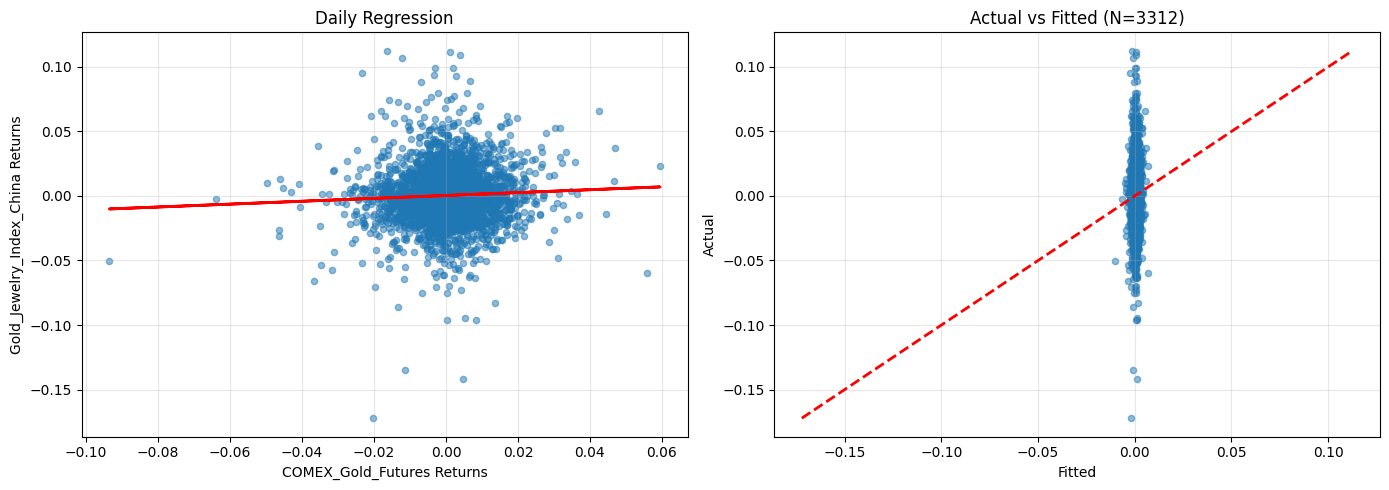

/tmp/ipython-input-3815417395.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3815417395.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3815417395.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")



Monthly Regression (β=0.7695, R²=0.1138)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.06
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           8.82e-06
Time:                        02:26:58   Log-Likelihood:                 162.67
No. Observations:                 166   AIC:                            -321.3
Df Residuals:                     164   BIC:                            -315.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

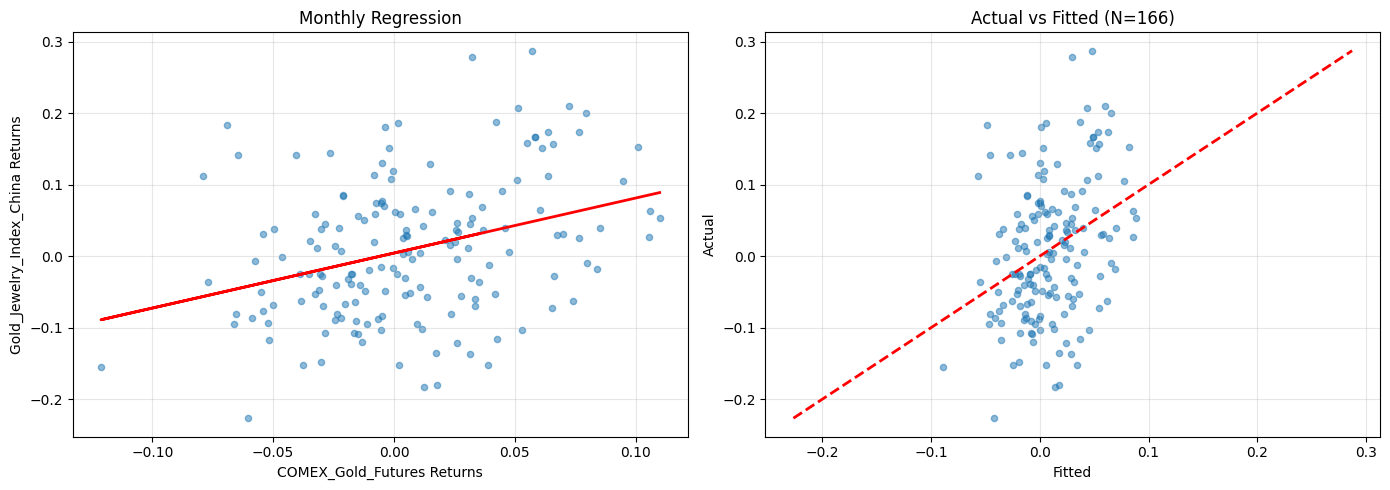

/tmp/ipython-input-3815417395.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3815417395.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3815417395.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")



Quarterly Regression (β=0.8125, R²=0.1292)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     8.014
Date:                Wed, 22 Oct 2025   Prob (F-statistic):            0.00651
Time:                        02:26:59   Log-Likelihood:                 21.718
No. Observations:                  56   AIC:                            -39.44
Df Residuals:                      54   BIC:                            -35.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

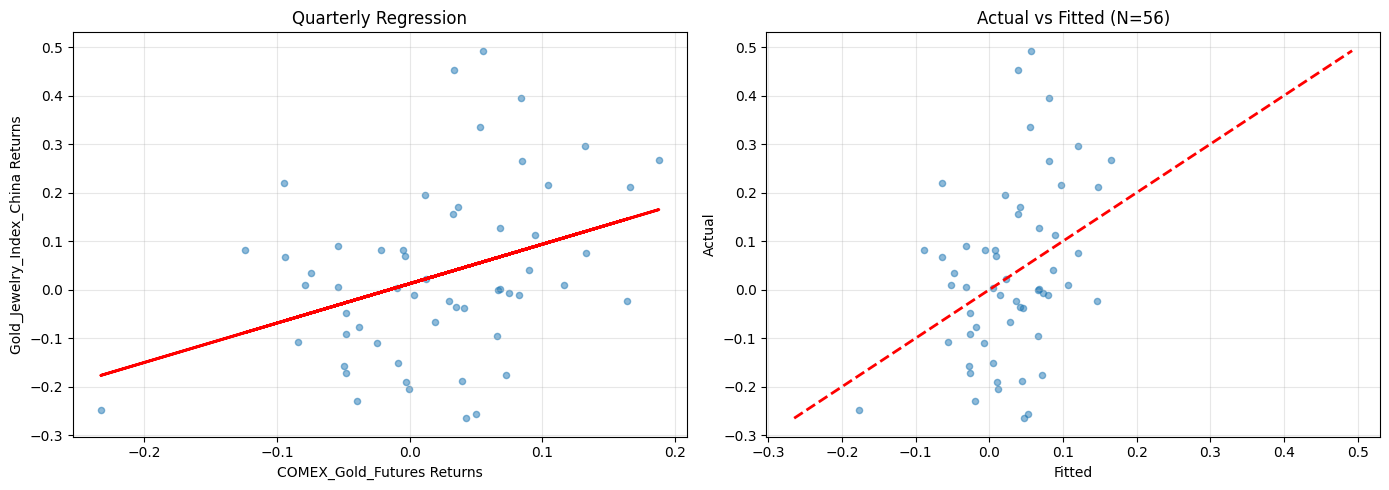

/tmp/ipython-input-3815417395.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3815417395.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-3815417395.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")



Yearly Regression (β=1.1812, R²=0.2909)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     4.923
Date:                Wed, 22 Oct 2025   Prob (F-statistic):             0.0465
Time:                        02:26:59   Log-Likelihood:                -4.7458
No. Observations:                  14   AIC:                             13.49
Df Residuals:                      12   BIC:                             14.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

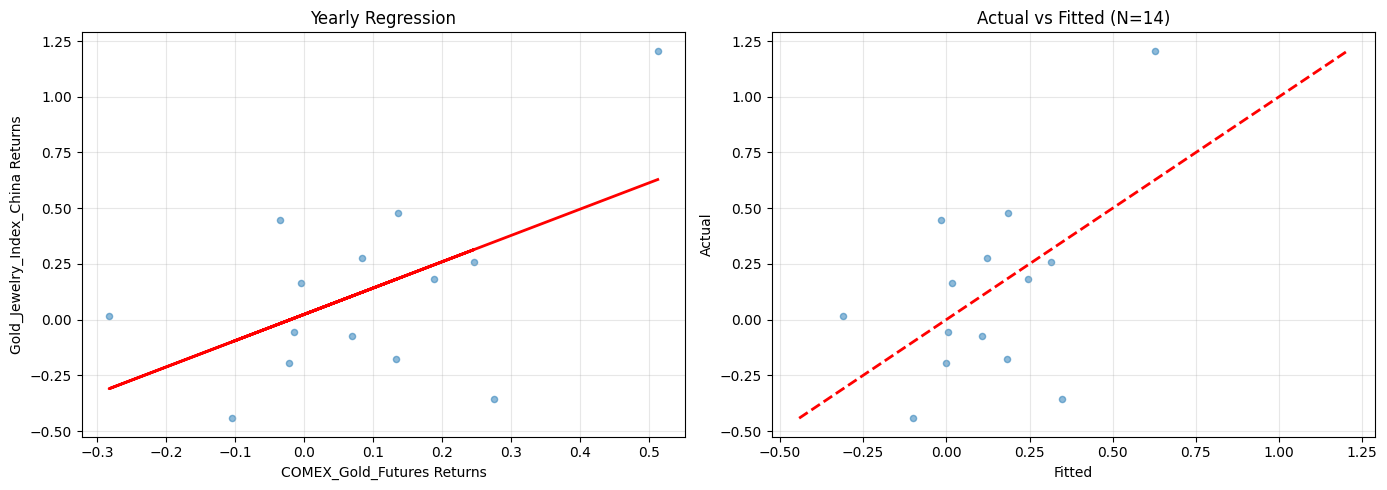

In [29]:
def run_regression_analysis(research_data, all_returns, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly'],
                            dep_var='Gold_Jewelry_Index_China', ind_var='COMEX_Gold_Futures'):
    """Run OLS regression across multiple time frequencies."""

    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    results = {}

    for freq in frequencies:
        try:
            # Get dependent returns
            dep = research_data['calculated_indices'][dep_var]['Close']
            dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()

            # Get independent returns
            ind = research_data['gold_prices'][ind_var]['Close']
            ind_ret = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()

            # Align and run regression
            data = pd.concat([dep_ret, ind_ret], axis=1).dropna()
            y, X = data.iloc[:, 0], sm.add_constant(data.iloc[:, 1])

            model = sm.OLS(y, X).fit()
            results[freq] = model

            print(f"\n{'='*60}\n{freq} Regression (β={model.params[1]:.4f}, R²={model.rsquared:.4f})\n{'='*60}")
            print(model.summary())

            # Plot
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
            ax1.scatter(data.iloc[:, 1], data.iloc[:, 0], alpha=0.5, s=20)
            ax1.plot(data.iloc[:, 1], model.fittedvalues, 'r-', lw=2)
            ax1.set_xlabel(f'{ind_var} Returns'), ax1.set_ylabel(f'{dep_var} Returns')
            ax1.set_title(f'{freq} Regression'), ax1.grid(True, alpha=0.3)

            ax2.scatter(model.fittedvalues, data.iloc[:, 0], alpha=0.5, s=20)
            lim = [min(model.fittedvalues.min(), data.iloc[:, 0].min()), max(model.fittedvalues.max(), data.iloc[:, 0].max())]
            ax2.plot(lim, lim, 'r--', lw=2)
            ax2.set_xlabel('Fitted'), ax2.set_ylabel('Actual')
            ax2.set_title(f'Actual vs Fitted (N={len(data)})'), ax2.grid(True, alpha=0.3)
            plt.tight_layout(), plt.show()

        except Exception as e:
            print(f"Error in {freq}: {e}")

    return results


# Usage - runs all four frequencies
results = run_regression_analysis(research_data, all_returns)


Daily Regression (R²=0.2661, N=3308)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     599.2
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          9.21e-223
Time:                        02:26:59   Log-Likelihood:                 8571.6
No. Observations:                3308   AIC:                        -1.714e+04
Df Residuals:                    3305   BIC:                        -1.712e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

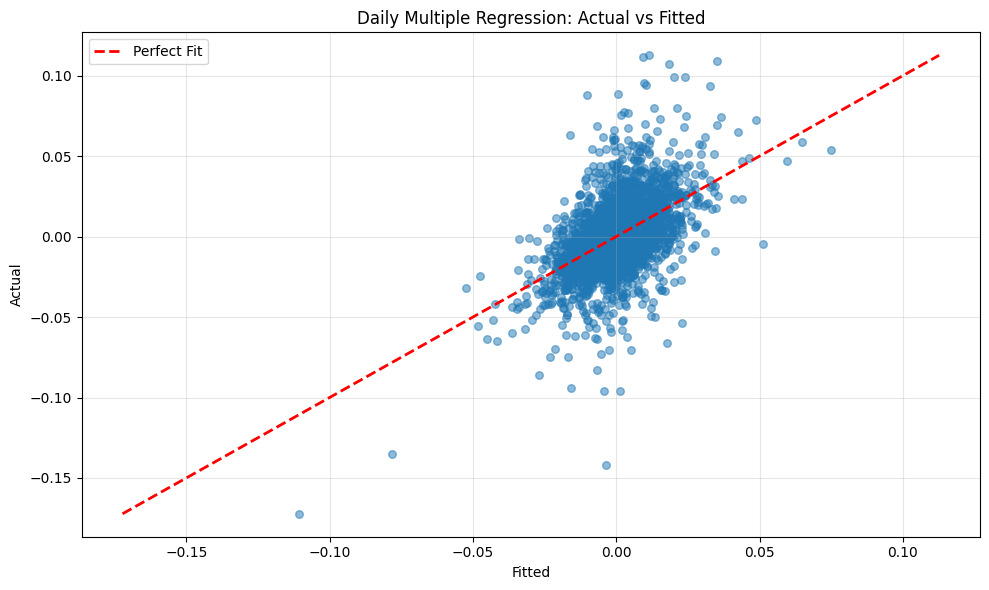


Monthly Regression (R²=0.3006, N=166)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     35.03
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           2.21e-13
Time:                        02:27:00   Log-Likelihood:                 182.33
No. Observations:                 166   AIC:                            -358.7
Df Residuals:                     163   BIC:                            -349.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/tmp/ipython-input-784841755.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-784841755.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-784841755.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()


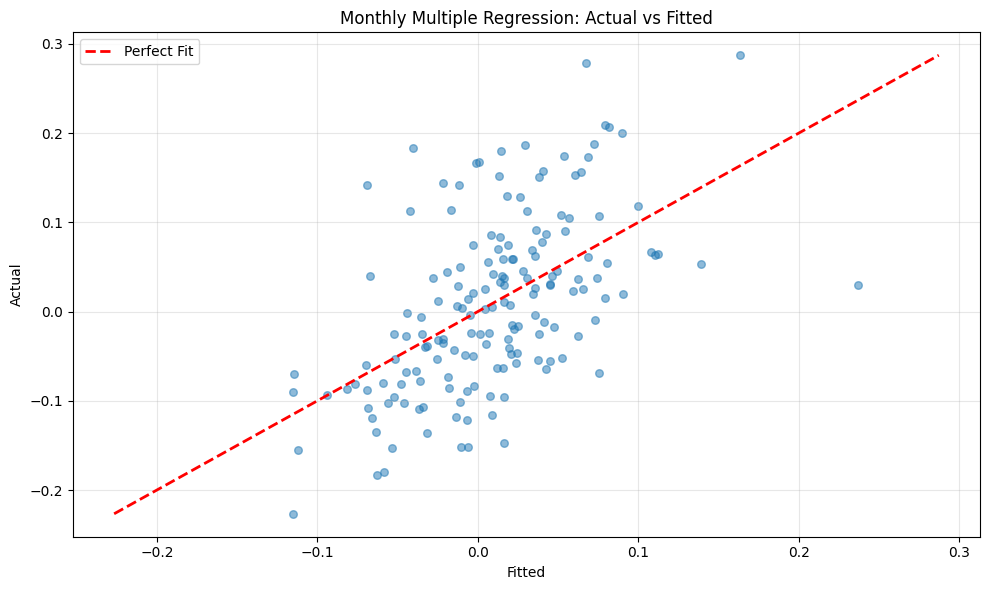

/tmp/ipython-input-784841755.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-784841755.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-784841755.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()



Quarterly Regression (R²=0.2526, N=56)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     8.954
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           0.000447
Time:                        02:27:00   Log-Likelihood:                 25.994
No. Observations:                  56   AIC:                            -45.99
Df Residuals:                      53   BIC:                            -39.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

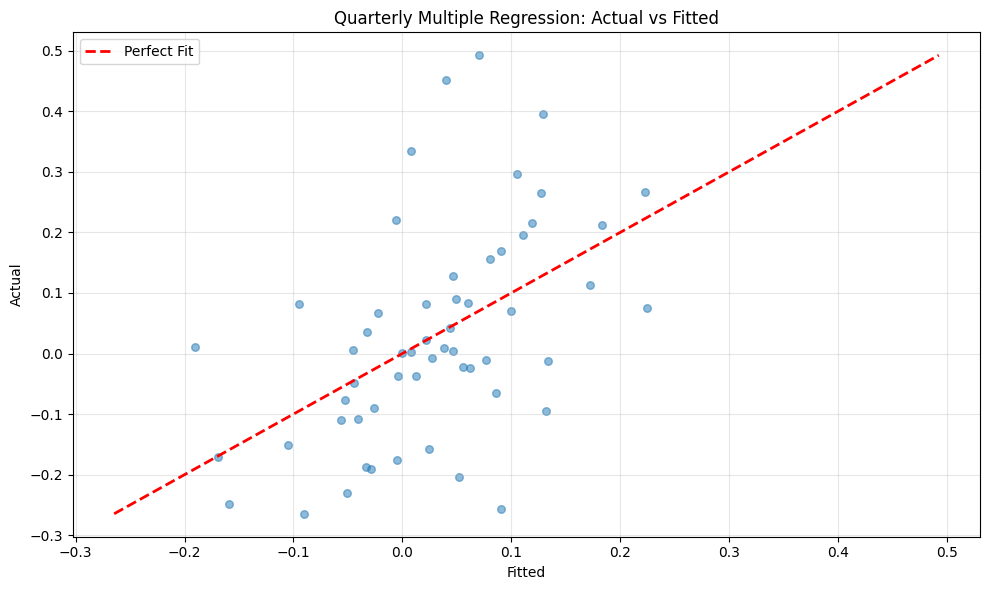

/tmp/ipython-input-784841755.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-784841755.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()
/tmp/ipython-input-784841755.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()



Yearly Regression (R²=0.3205, N=14)
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     2.594
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.119
Time:                        02:27:00   Log-Likelihood:                -4.4475
No. Observations:                  14   AIC:                             14.90
Df Residuals:                      11   BIC:                             16.81
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

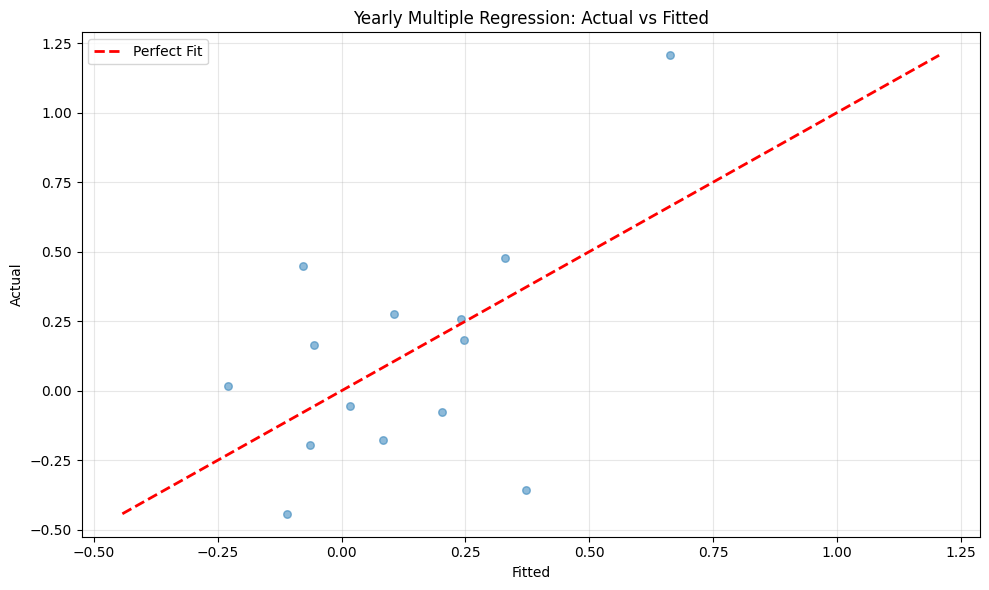

In [30]:
def run_multiple_regression_all_freq(data, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly'],
                                     dep_var='Gold_Jewelry_Index_China', ind_vars=['COMEX_Gold_Futures', 'Hang_Seng_Index']):
    """Run multiple regression across all frequencies."""

    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    var_map = {'COMEX_Gold_Futures': ('gold_prices', 'Close'), 'Hang_Seng_Index': ('indices', 'Close')}
    results = {}

    for freq in frequencies:
        try:
            # Get dependent returns
            dep = data['calculated_indices'][dep_var]['Close']
            dep_ret = dep.pct_change().dropna() if freq == 'Daily' else dep.resample(freq_map[freq]).last().pct_change().dropna()

            # Get independent returns
            ind_data = pd.DataFrame()
            for var in ind_vars:
                if var not in var_map:
                    continue
                cat, col = var_map[var]
                ind = data[cat][var][col]
                ind_data[f'{var}_Returns'] = ind.pct_change().dropna() if freq == 'Daily' else ind.resample(freq_map[freq]).last().pct_change().dropna()

            # Align and run regression
            reg_data = pd.concat([dep_ret, ind_data], axis=1).dropna()

            if len(reg_data) < len(ind_vars) + 2:
                print(f"{freq}: Not enough data ({len(reg_data)} obs)")
                continue

            y, X = reg_data.iloc[:, 0], sm.add_constant(reg_data.iloc[:, 1:])
            model = sm.OLS(y, X).fit()
            results[freq] = model

            print(f"\n{'='*60}\n{freq} Regression (R²={model.rsquared:.4f}, N={len(reg_data)})\n{'='*60}")
            print(model.summary())

            # Plot
            plt.figure(figsize=(10, 6))
            plt.scatter(model.fittedvalues, y, alpha=0.5, s=30)
            lim = [min(model.fittedvalues.min(), y.min()), max(model.fittedvalues.max(), y.max())]
            plt.plot(lim, lim, 'r--', lw=2, label='Perfect Fit')
            plt.xlabel('Fitted'), plt.ylabel('Actual')
            plt.title(f'{freq} Multiple Regression: Actual vs Fitted'), plt.legend(), plt.grid(True, alpha=0.3)
            plt.tight_layout(), plt.show()

        except Exception as e:
            print(f"Error in {freq}: {e}")

    return results


# Usage:
results = run_multiple_regression_all_freq(research_data,
                                           ind_vars=['COMEX_Gold_Futures', 'Hang_Seng_Index'])



Daily (N=3308):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.052155  0.515028
COMEX         0.052155  1.000000  0.044815
HSI           0.515028  0.044815  1.000000



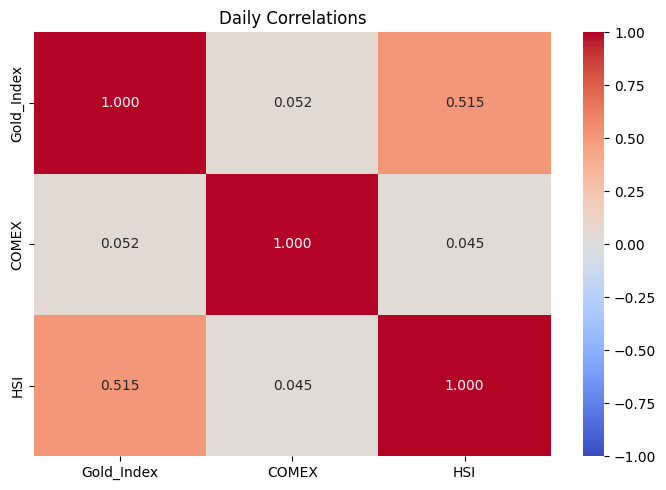

/tmp/ipython-input-2476859006.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Gold_Index': gold_idx.resample(rf).last().pct_change(),
/tmp/ipython-input-2476859006.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'COMEX': comex.resample(rf).last().pct_change(),
/tmp/ipython-input-2476859006.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'HSI': hsi.resample(rf).last().pct_change()



Monthly (N=166):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.337321  0.503438
COMEX         0.337321  1.000000  0.252579
HSI           0.503438  0.252579  1.000000



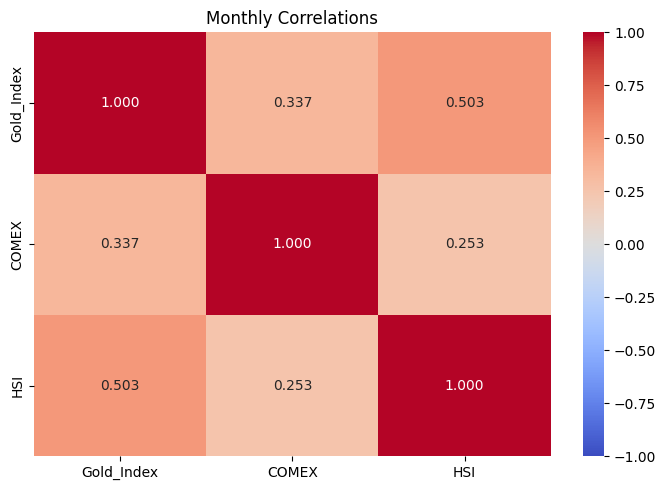

/tmp/ipython-input-2476859006.py:23: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'Gold_Index': gold_idx.resample(rf).last().pct_change(),
/tmp/ipython-input-2476859006.py:24: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'COMEX': comex.resample(rf).last().pct_change(),
/tmp/ipython-input-2476859006.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'HSI': hsi.resample(rf).last().pct_change()



Quarterly (N=56):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.359489  0.455430
COMEX         0.359489  1.000000  0.352835
HSI           0.455430  0.352835  1.000000



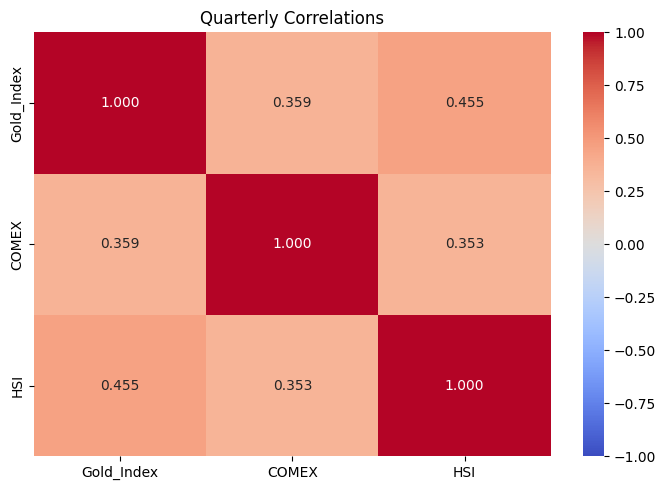

/tmp/ipython-input-2476859006.py:23: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'Gold_Index': gold_idx.resample(rf).last().pct_change(),
/tmp/ipython-input-2476859006.py:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'COMEX': comex.resample(rf).last().pct_change(),
/tmp/ipython-input-2476859006.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'HSI': hsi.resample(rf).last().pct_change()



Yearly (N=14):
            Gold_Index     COMEX       HSI
Gold_Index    1.000000  0.539352  0.430249
COMEX         0.539352  1.000000  0.526623
HSI           0.430249  0.526623  1.000000



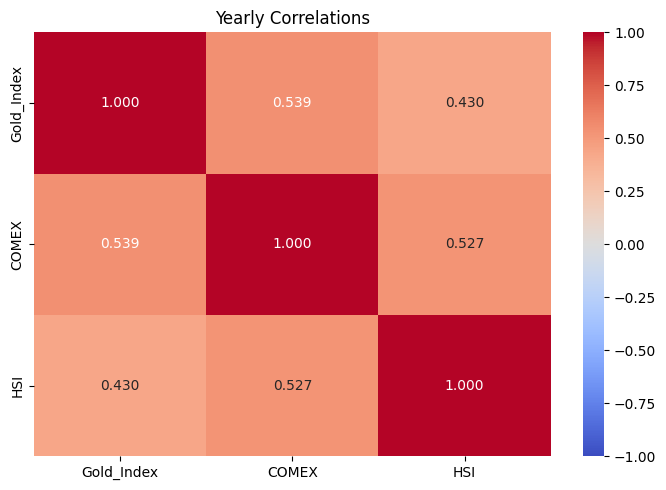

In [31]:
def correlation_analysis(data, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly']):
    """Quick correlation analysis across frequencies."""

    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    results = {}

    for freq in frequencies:
        try:
            # Get returns
            gold_idx = data['calculated_indices']['Gold_Jewelry_Index_China']['Close']
            comex = data['gold_prices']['COMEX_Gold_Futures']['Close']
            hsi = data['indices']['Hang_Seng_Index']['Close']

            if freq == 'Daily':
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.pct_change(),
                    'COMEX': comex.pct_change(),
                    'HSI': hsi.pct_change()
                }).dropna()
            else:
                rf = freq_map[freq]
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.resample(rf).last().pct_change(),
                    'COMEX': comex.resample(rf).last().pct_change(),
                    'HSI': hsi.resample(rf).last().pct_change()
                }).dropna()

            corr = returns.corr()
            results[freq] = corr

            print(f"\n{freq} (N={len(returns)}):\n{corr}\n")

            plt.figure(figsize=(7, 5))
            sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1, center=0)
            plt.title(f'{freq} Correlations'), plt.tight_layout(), plt.show()

        except Exception as e:
            print(f"{freq} error: {e}")

    return results


# Usage
corr_results = correlation_analysis(research_data)



Daily Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          1.76e-222
Time:                        02:27:05   Log-Likelihood:                 8580.3
No. Observations:                3308   AIC:                        -1.715e+04
Df Residuals:                    3302   BIC:                        -1.711e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

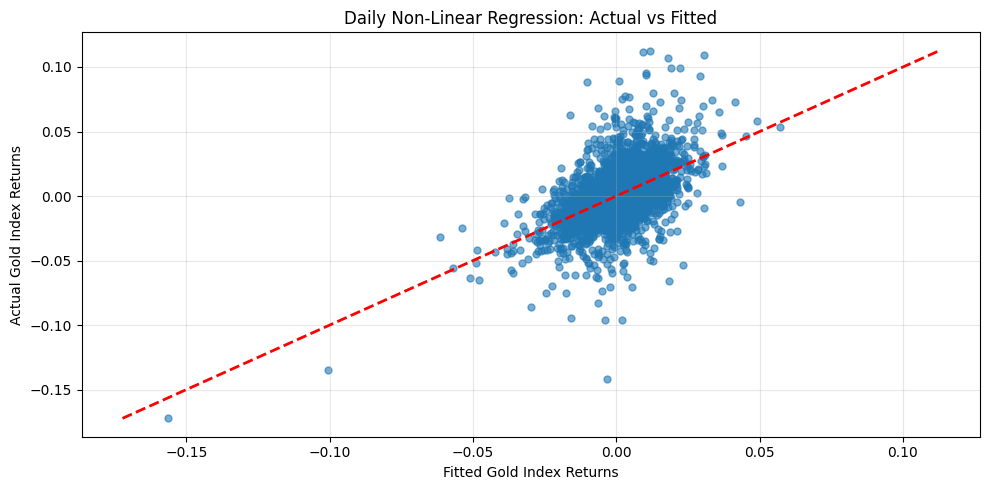

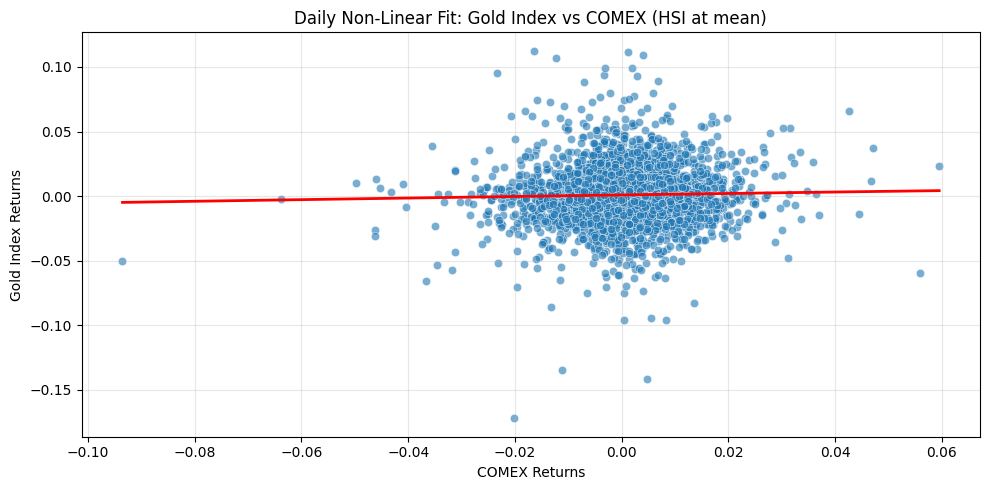

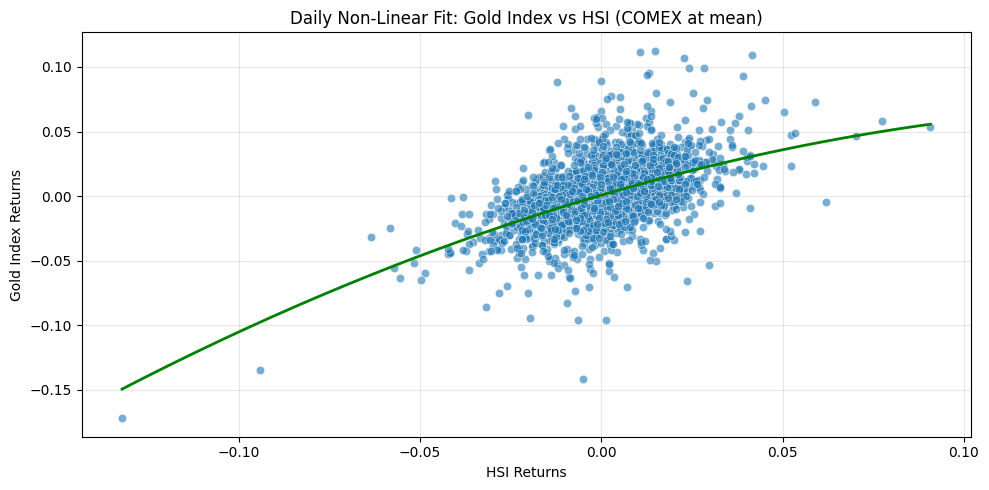


Monthly Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     16.41
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           4.66e-13
Time:                        02:27:05   Log-Likelihood:                 187.01
No. Observations:                 166   AIC:                            -362.0
Df Residuals:                     160   BIC:                            -343.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

/tmp/ipython-input-1232134760.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
/tmp/ipython-input-1232134760.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'COMEX': comex.resample(fcode).last().pct_change(),
/tmp/ipython-input-1232134760.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'HSI': hsi.resample(fcode).last().pct_change()


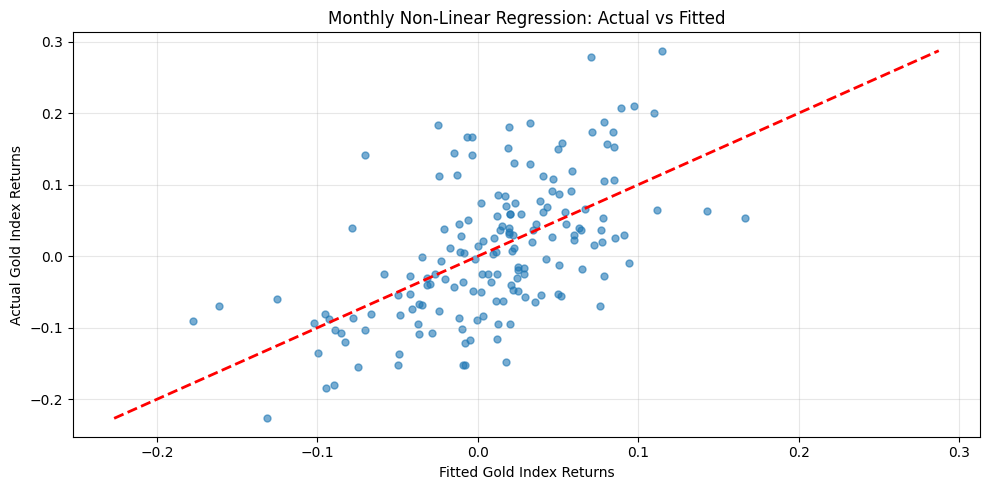

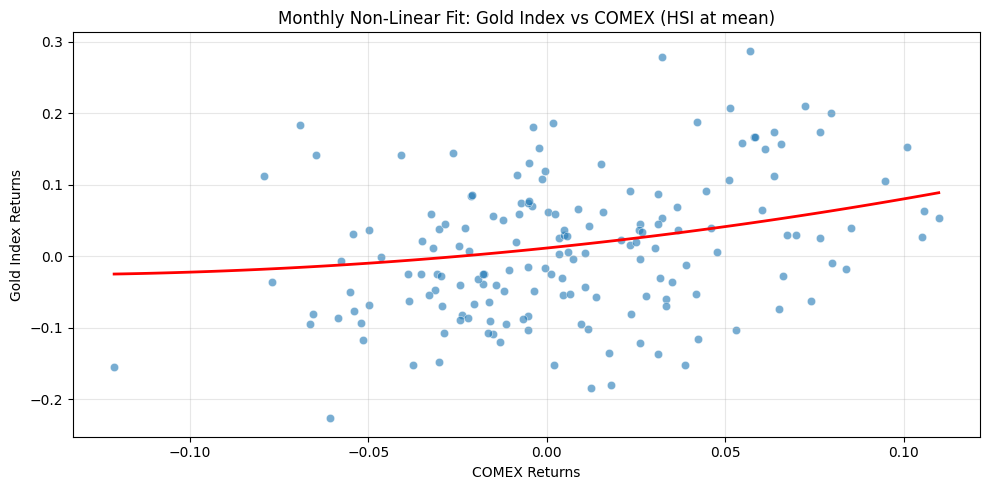

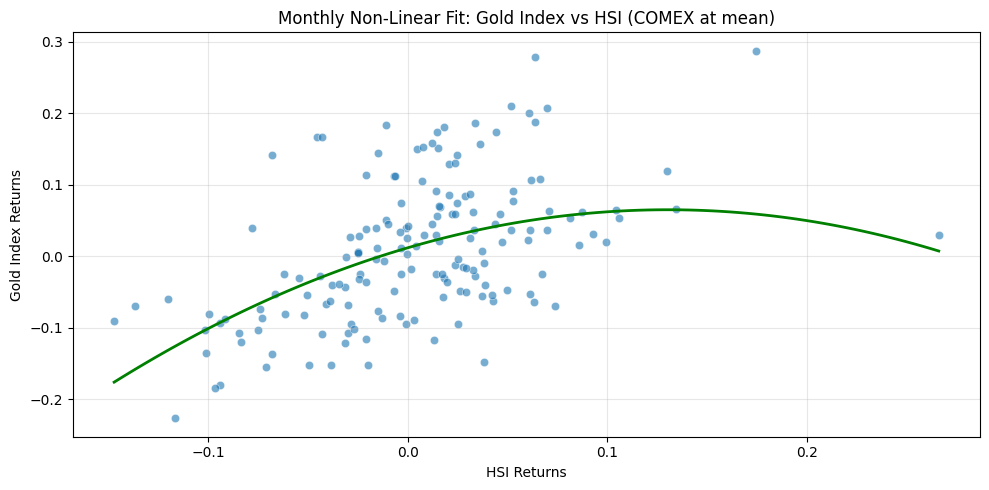


Quarterly Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.009
Date:                Wed, 22 Oct 2025   Prob (F-statistic):            0.00390
Time:                        02:27:06   Log-Likelihood:                 27.283
No. Observations:                  56   AIC:                            -42.57
Df Residuals:                      50   BIC:                            -30.41
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const   

/tmp/ipython-input-1232134760.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
/tmp/ipython-input-1232134760.py:23: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'COMEX': comex.resample(fcode).last().pct_change(),
/tmp/ipython-input-1232134760.py:24: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  'HSI': hsi.resample(fcode).last().pct_change()


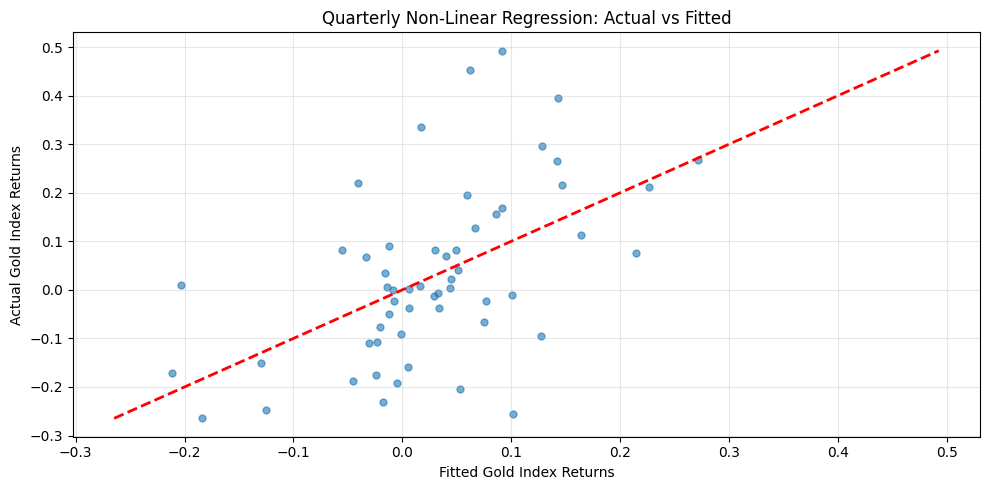

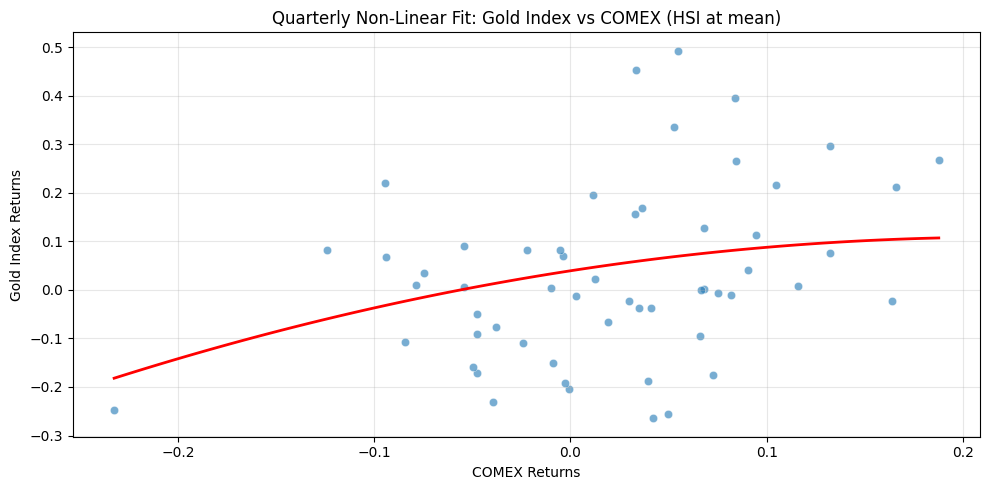

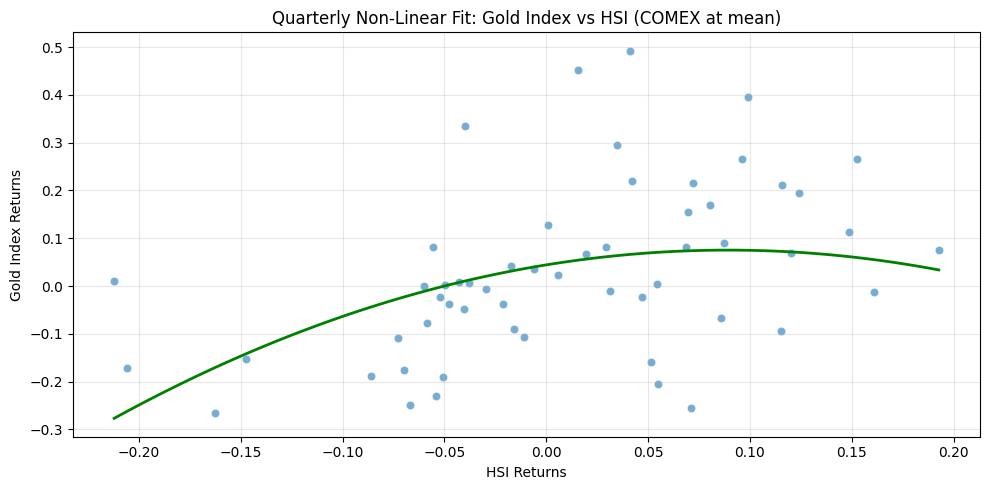


Yearly Non-Linear Regression Analysis
                            OLS Regression Results                            
Dep. Variable:             Gold_Index   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2.006
Date:                Wed, 22 Oct 2025   Prob (F-statistic):              0.182
Time:                        02:27:07   Log-Likelihood:                -1.4642
No. Observations:                  14   AIC:                             14.93
Df Residuals:                       8   BIC:                             18.76
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const      

/tmp/ipython-input-1232134760.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
/tmp/ipython-input-1232134760.py:23: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'COMEX': comex.resample(fcode).last().pct_change(),
/tmp/ipython-input-1232134760.py:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'HSI': hsi.resample(fcode).last().pct_change()


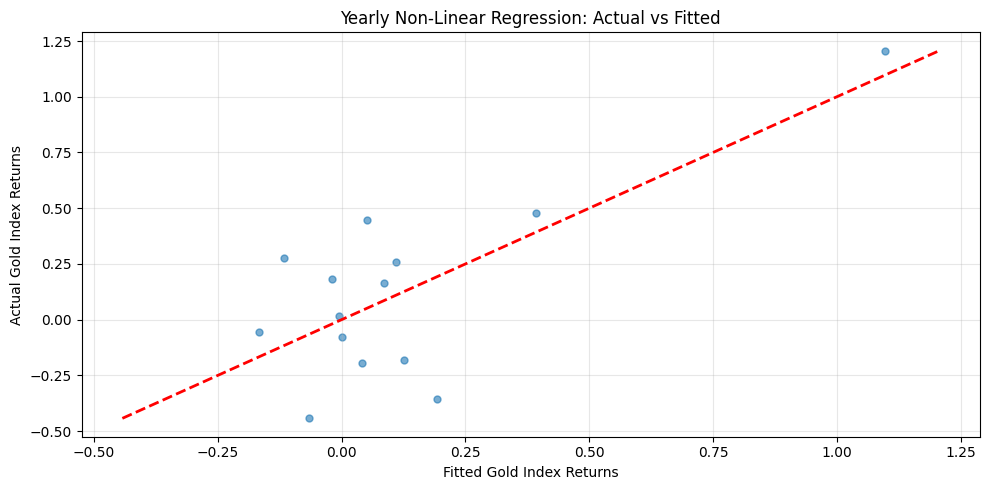

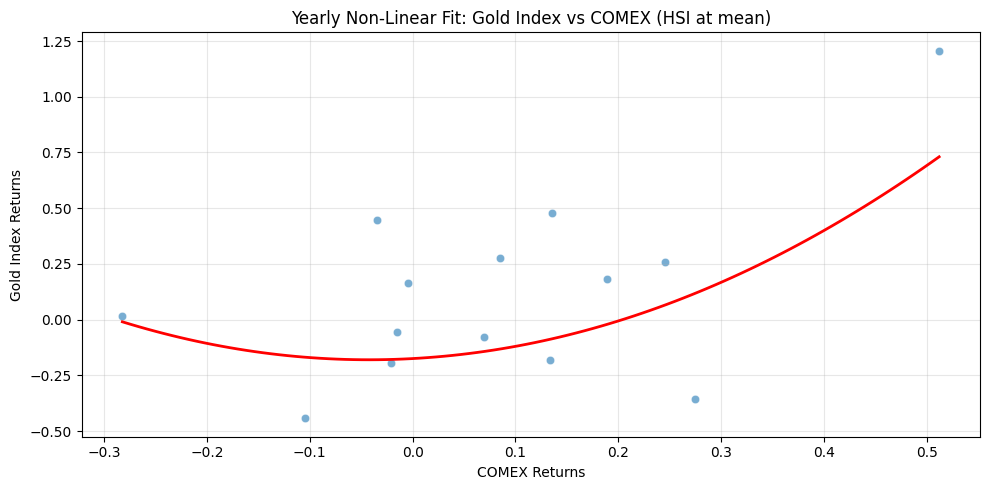

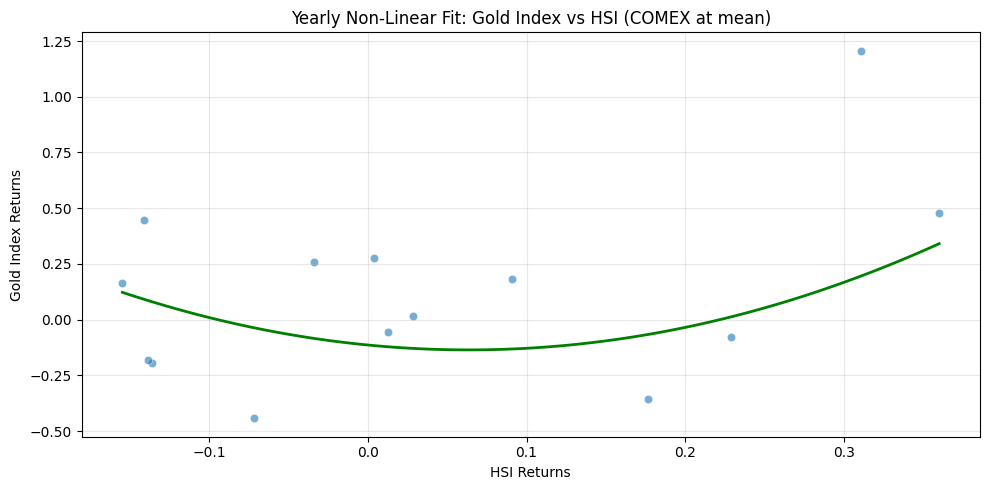

In [33]:
def nonlinear_regression_all_freq(data, frequencies=['Daily', 'Monthly', 'Quarterly', 'Yearly']):
    """Run non-linear regression with polynomial and interaction terms across multiple time frequencies."""

    freq_map = {'Daily': None, 'Monthly': 'M', 'Quarterly': 'Q', 'Yearly': 'Y'}
    results = {}
    for freq in frequencies:
        try:
            print(f"\n{'='*60}\n{freq} Non-Linear Regression Analysis\n{'='*60}")
            # Get returns
            gold_idx = data['calculated_indices']['Gold_Jewelry_Index_China']['Close']
            comex = data['gold_prices']['COMEX_Gold_Futures']['Close']
            hsi = data['indices']['Hang_Seng_Index']['Close']
            if freq == 'Daily':
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.pct_change(),
                    'COMEX': comex.pct_change(),
                    'HSI': hsi.pct_change()
                }).dropna()
            else:
                fcode = freq_map[freq]
                returns = pd.DataFrame({
                    'Gold_Index': gold_idx.resample(fcode).last().pct_change(),
                    'COMEX': comex.resample(fcode).last().pct_change(),
                    'HSI': hsi.resample(fcode).last().pct_change()
                }).dropna()

            # Build regression matrix with non-linear terms
            X = returns[['COMEX', 'HSI']].copy()
            X['COMEX_sq'] = X['COMEX']**2
            X['HSI_sq'] = X['HSI']**2
            X['Interaction'] = X['COMEX'] * X['HSI']
            X = sm.add_constant(X)
            y = returns['Gold_Index']

            # Fit non-linear model
            model = sm.OLS(y, X).fit()
            results[freq] = model
            print(model.summary())

            # ==================== F-TEST: LINEAR VS NON-LINEAR ====================
            print(f"\n{'='*60}\n{freq} F-Test: Linear vs Non-Linear Models\n{'='*60}")

            # Fit linear model (only COMEX and HSI, no squared terms or interaction)
            X_linear = sm.add_constant(returns[['COMEX', 'HSI']])
            model_linear = sm.OLS(y, X_linear).fit()

            # Calculate F-statistic
            from scipy import stats
            SSR_linear = np.sum(model_linear.resid**2)
            SSR_nonlinear = np.sum(model.resid**2)
            p_nonlinear = 3  # 3 non-linear terms added (COMEX_sq, HSI_sq, Interaction)
            n = len(y)
            k_linear = 2  # 2 parameters in linear model (before constant)

            F_stat = ((SSR_linear - SSR_nonlinear) / p_nonlinear) / (SSR_nonlinear / (n - k_linear - 1 - p_nonlinear))
            p_value = 1 - stats.f.cdf(F_stat, p_nonlinear, n - k_linear - 1 - p_nonlinear)

            print(f"\nLinear Model (COMEX + HSI only):")
            print(f"  R²: {model_linear.rsquared:.4f}")
            print(f"  Adj R²: {model_linear.rsquared_adj:.4f}")

            print(f"\nNon-Linear Model (COMEX + HSI + squared + interaction):")
            print(f"  R²: {model.rsquared:.4f}")
            print(f"  Adj R²: {model.rsquared_adj:.4f}")

            print(f"\nF-Test Results:")
            print(f"  F-Statistic: {F_stat:.4f}")
            print(f"  P-value: {p_value:.4f}")
            print(f"  Observations (n): {n}")
            print(f"  Non-linear parameters added (p): {p_nonlinear}")
            print(f"  ΔR²: {model.rsquared - model_linear.rsquared:.4f}")

            if p_value < 0.05:
                print(f"  ✓ RESULT: Non-linear model is SIGNIFICANTLY BETTER (p < 0.05)")
            else:
                print(f"  ✗ RESULT: Linear model is SUFFICIENT (p ≥ 0.05, no improvement from non-linear terms)")
            # ==================== END F-TEST ====================

            # Plot: Actual vs fitted Gold Index Returns
            plt.figure(figsize=(10, 5))
            plt.scatter(model.fittedvalues, y, alpha=0.6, s=25)
            lim = [min(model.fittedvalues.min(), y.min()), max(model.fittedvalues.max(), y.max())]
            plt.plot(lim, lim, 'r--', lw=2)
            plt.xlabel('Fitted Gold Index Returns'), plt.ylabel('Actual Gold Index Returns')
            plt.title(f'{freq} Non-Linear Regression: Actual vs Fitted'), plt.grid(True, alpha=0.3)
            plt.tight_layout(), plt.show()

            # Plot non-linear fit vs. COMEX (HSI fixed at mean)
            x_comex_range = np.linspace(X['COMEX'].min(), X['COMEX'].max(), 100)
            hsi_mean = X['HSI'].mean()
            pred_comex = pd.DataFrame({
                'const': 1,
                'COMEX': x_comex_range,
                'HSI': hsi_mean,
                'COMEX_sq': x_comex_range**2,
                'HSI_sq': hsi_mean**2,
                'Interaction': x_comex_range*hsi_mean
            })
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=returns['COMEX'], y=y, alpha=0.6)
            plt.plot(x_comex_range, model.predict(pred_comex), color='r', lw=2)
            plt.title(f'{freq} Non-Linear Fit: Gold Index vs COMEX (HSI at mean)'), plt.xlabel('COMEX Returns'), plt.ylabel('Gold Index Returns')
            plt.grid(True, alpha=0.3), plt.tight_layout(), plt.show()

            # Plot non-linear fit vs. HSI (COMEX fixed at mean)
            x_hsi_range = np.linspace(X['HSI'].min(), X['HSI'].max(), 100)
            comex_mean = X['COMEX'].mean()
            pred_hsi = pd.DataFrame({
                'const': 1,
                'COMEX': comex_mean,
                'HSI': x_hsi_range,
                'COMEX_sq': comex_mean**2,
                'HSI_sq': x_hsi_range**2,
                'Interaction': comex_mean*x_hsi_range
            })
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=returns['HSI'], y=y, alpha=0.6)
            plt.plot(x_hsi_range, model.predict(pred_hsi), color='g', lw=2)
            plt.title(f'{freq} Non-Linear Fit: Gold Index vs HSI (COMEX at mean)'), plt.xlabel('HSI Returns'), plt.ylabel('Gold Index Returns')
            plt.grid(True, alpha=0.3), plt.tight_layout(), plt.show()

        except Exception as e:
            print(f"Error in {freq}: {e}")
    return results


# Usage:
nonlinear_results = nonlinear_regression_all_freq(research_data)
